In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.2.1


Evaluating Histroy-Swapping.............................. 1.0 seconds
Regret: 67.53 +/- 38.06 (median: 9.00, max: 1132.00, min: 5.00)
Evaluating Histroy-Swapping.............................. 34.9 seconds
Regret: 103.00 +/- 46.21 (median: 18.00, max: 1394.00, min: -2.00)
Evaluating Histroy-Swapping.............................. 35.9 seconds
Regret: 37.67 +/- 7.71 (median: 19.50, max: 187.00, min: 14.00)
Evaluating Histroy-Swapping.............................. 37.6 seconds
Regret: 41.57 +/- 12.38 (median: 25.00, max: 359.00, min: -8.00)
Evaluating Histroy-Swapping.............................. 43.0 seconds
Regret: 50.83 +/- 7.52 (median: 38.00, max: 204.00, min: 27.00)
Evaluating Histroy-Swapping.............................. 46.6 seconds
Regret: 50.60 +/- 4.27 (median: 46.00, max: 170.00, min: 34.00)
Evaluating Histroy-Swapping.............................. 49.3 seconds
Regret: 55.27 +/- 2.80 (median: 51.50, max: 128.00, min: 39.00)
Evaluating Histroy-Swapping.........................

Evaluating Histroy-Swapping.............................. 59.5 seconds
Regret: 141.10 +/- 3.35 (median: 139.00, max: 189.09, min: 115.80)
Evaluating Histroy-Swapping.............................. 63.0 seconds
Regret: 169.39 +/- 4.62 (median: 159.94, max: 225.97, min: 132.11)
Evaluating Histroy-Swapping.............................. 65.0 seconds
Regret: 201.55 +/- 6.23 (median: 199.52, max: 309.13, min: 154.34)
Evaluating Histroy-Swapping.............................. 69.8 seconds
Regret: 236.47 +/- 6.92 (median: 230.20, max: 320.82, min: 164.31)
Evaluating Histroy-Swapping.............................. 1.0 seconds
Regret: 405.72 +/- 166.01 (median: 33.36, max: 4650.67, min: 2.35)
Evaluating Histroy-Swapping.............................. 36.8 seconds
Regret: 157.80 +/- 43.28 (median: 34.82, max: 831.97, min: -43.11)
Evaluating Histroy-Swapping.............................. 34.8 seconds
Regret: 78.16 +/- 27.66 (median: 29.12, max: 788.20, min: 5.93)
Evaluating Histroy-Swapping...........

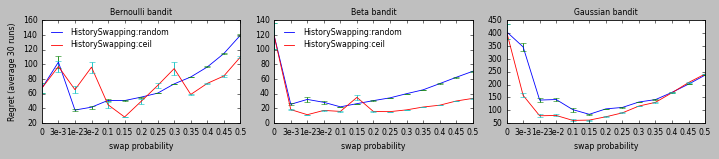

In [5]:
import datetime

swap_probs = [0, 3e-3, 1e-2, 3e-2, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
swap_probs_labels = ['0', '3e-3', '1e-2', '3e-2', '0.1', '0.15', '0.2', '0.25', 
                     '0.3', '0.35', '0.4', '0.45', '0.5'] 

x_axis = np.arange(len(swap_probs))
num_runs = 30
n = 10000
K = 10

plt.figure(figsize=(9, 2))
algs = ['HistorySwapping']
colors = {'HistorySwapping':'red'}

for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = np.random.rand(K)
    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(BetaBandit(mu))
    else:
      env.append(GaussBandit(mu))

  plt.subplot(1, 3, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    for sample_method in ['random', 'ceil']:
        alg_class = globals()[alg]
        regret_means = []
        regret_vars = []
        for swap_prob in swap_probs:
            regret, _ = evaluate_parallel(alg_class, {"swap_prob": swap_prob, 
                        "sample_method": sample_method}, env, n, num_process=12)
            cum_regret = regret.sum(axis=0)
            regret_means.append(cum_regret.mean())
            regret_vars.append(cum_regret.std()/np.sqrt(num_runs))

        plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), 
                 label=alg+':'+sample_method)
        plt.errorbar(x_axis, regret_means, regret_vars, fmt="none")
        plt.xticks(x_axis, swap_probs_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  elif fig == 1:
    plt.title("Beta bandit")
  else:
    plt.title("Gaussian bandit")
    
  plt.xlabel("swap probability")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../results/HS_vs_SwapProb_{}_{}_{}_{}.jpeg" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Histroy-Swapping-SampleWithReplacement.......... 0.9 seconds
Regret: 346.70 +/- 123.62 (median: 168.00, max: 1014.00, min: 6.00)
Evaluating Histroy-Swapping-SampleWithReplacement.......... 69.0 seconds
Regret: 409.80 +/- 143.75 (median: 303.50, max: 1421.00, min: 8.00)
Evaluating Histroy-Swapping-SampleWithReplacement.......... 69.4 seconds
Regret: 318.80 +/- 152.64 (median: 17.00, max: 1484.00, min: 9.00)
Evaluating Histroy-Swapping-SampleWithReplacement.......... 71.0 seconds
Regret: 165.60 +/- 94.12 (median: 12.00, max: 986.00, min: 8.00)
Evaluating Histroy-Swapping-SampleWithReplacement.......... 75.3 seconds
Regret: 329.30 +/- 165.35 (median: 19.50, max: 1643.00, min: 5.00)
Evaluating Histroy-Swapping-SampleWithReplacement.......... 70.2 seconds
Regret: 281.90 +/- 147.73 (median: 10.00, max: 1565.00, min: 6.00)
Evaluating Histroy-Swapping-SampleWithReplacement.......... 69.3 seconds
Regret: 108.10 +/- 49.36 (median: 16.50, max: 462.00, min: 9.00)
Evaluating Histroy-Swap

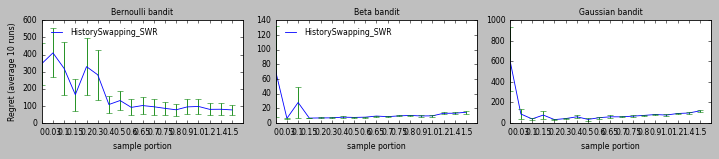

In [3]:
import datetime

sample_portions = [0, 3e-2, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65, 
                   0.7, 0.75, 0.8, 0.9, 1.0, 1.2, 1.4, 1.5]
sample_portions_labels = [str(x) for x in sample_portions] 

# sample_portions = [0, 0.1, 0.2, 0.5, 0.7, 1.0]
# sample_portions_labels = ['0', '0.1', '0.2', 
#                           '0.5', '0.7', '1.0'] 

x_axis = np.arange(len(sample_portions))
num_runs = 10
n = 10000
K = 10

plt.figure(figsize=(9, 2))
algs = ['HistorySwapping_SWR']
colors = {'HistorySwapping_SWR':'red'}

for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = np.random.rand(K)
    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(BetaBandit(mu))
    else:
      env.append(GaussBandit(mu))

  plt.subplot(1, 3, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for sample_portion in sample_portions:
        regret, _ = evaluate_parallel(alg_class, {"sample_portion": sample_portion}, 
                                      env, n, num_process=10)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/np.sqrt(num_runs))

    plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), 
             label=alg)
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none")
    plt.xticks(x_axis, sample_portions_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  elif fig == 1:
    plt.title("Beta bandit")
  else:
    plt.title("Gaussian bandit")
    
  plt.xlabel("sample portion")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../results/HS_SWR_vs_SamplePortion_{}_{}_{}_{}.jpeg" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()